In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm    
import statsmodels.formula.api as smf

In [2]:
politic = pd.read_csv('91750_Match_Original_Data.csv', index_col='crna_ID')
pd.set_option('display.max_column', 112)
politic.shape

C:\Users\sebmi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9,58,66,78,91,92,98,99,100,103,104,105,107,109,110,111,118,119,124,126,127,133,135,136,140,142,143,148,150,152,168,170,172,175,179,180,183,184,185,186,187,188,192,195,199,202,203,215,216,218,219,224,231,243,244,253,261,277,278,284,320,337,349,350,356) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(45744, 367)

In [3]:
zip_to_state = pd.read_csv('US_Zip_to_State.01.csv')
zip_to_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33099 entries, 0 to 33098
Data columns (total 16 columns):
zip                   33099 non-null int64
lat                   33099 non-null float64
lng                   33099 non-null float64
city                  33099 non-null object
state_id              33099 non-null object
state_name            33099 non-null object
zcta                  33099 non-null bool
parent_zcta           0 non-null float64
population            33099 non-null int64
density               33099 non-null float64
county_fips           33099 non-null int64
county_name           33099 non-null object
all_county_weights    33099 non-null object
imprecise             33099 non-null bool
military              33099 non-null bool
timezone              33099 non-null object
dtypes: bool(3), float64(4), int64(3), object(6)
memory usage: 3.4+ MB


In [4]:
fbi = pd.read_csv('Table5_FBI_Gov_2018.csv')
fbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 11 columns):
State                               52 non-null object
population                          52 non-null int64
violent_crime                       52 non-null int64
murder_nonnegligent_manslaughter    52 non-null int64
rape                                52 non-null int64
robbery                             52 non-null int64
aggravated_assault                  52 non-null int64
propert_crime                       52 non-null int64
burglary                            52 non-null int64
larceny_theft                       52 non-null int64
motor_vehicle_theft                 52 non-null int64
dtypes: int64(10), object(1)
memory usage: 4.6+ KB


In [5]:
politic.isna().mean().mean()

0.8418118652031498

In [6]:
politic['FECDonors_TotalDonationsAmount'].isna().mean()

0.9685423224903813

In [7]:
politic['FECDonors_NumberOfDonations'].isna().mean()

0.9685423224903813

In [8]:
(politic.isna().mean()>=0.7).sum()

278

In [9]:
politic = politic[politic.columns.drop(list(politic.filter(regex='InHome')))]

In [10]:
politic = politic[politic.columns.drop(list(politic.filter(regex='In_Household')))]

In [11]:
politic = politic[politic.columns.drop(list(politic.filter(regex='Primary_')))]

In [12]:
politic = politic[politic.columns.drop(list(politic.filter(regex='PRI_BLT_')))]

In [13]:
politic = politic[politic.columns.drop(list(politic.filter(regex='General_')))]

In [14]:
politic.dropna(subset=['FECDonors_TotalDonationsAmount'], inplace=True)

In [15]:
politic.dropna(subset=['FECDonors_NumberOfDonations'], inplace=True)

In [16]:
politic.dropna(axis=1,how='all',thresh=0.3*len(politic), inplace=True)

In [17]:
politic.head()

,SEQUENCE,LALVOTERID,Voters_StateVoterID,Voters_CountyVoterID,VoterTelephones_TelConfidenceCode,VoterTelephones_TelCellFlag,Residence_Addresses_Zip,Residence_Addresses_ZipPlus4,Residence_Addresses_HouseNumber,Residence_Addresses_StreetName,Residence_Addresses_Designator,Residence_Addresses_CensusTract,Residence_Addresses_CensusBlockGroup,Residence_Addresses_CensusBlock,Residence_Families_FamilyID,Residence_Families_HHCount,Residence_HHGender_Description,Residence_HHParties_Description,Mailing_Families_FamilyID,Mailing_Families_HHCount,Mailing_HHGender_Description,Mailing_HHParties_Description,Voters_Gender,Voters_Age,Voters_BirthDate,Parties_Description,Ethnic_Description,Religions_Description,Voters_CalculatedRegDate,Voters_OfficialRegDate,Languages_Description,MaritalStatus_Description,CommercialData_PresenceOfChildrenCode,CommercialData_ISPSA,CommercialData_DwellingType,CommercialData_DwellingUnitSize,CommercialData_EstimatedIncomeAmount,CommercialData_EstimatedIncome,CommercialData_Education,CommercialData_Occupation,CommercialData_HomePurchasePrice,CommercialData_HomePurchaseDate,CommercialData_LandValue,CommercialData_PropertyType,CommercialData_EstHomeValue,CommercialData_HHComposition,US_Congressional_District,State_House_District,State_Senate_District,County,City,County_Commissioner_District,Designated_Market_Area_(DMA),Precinct,School_District,CommercialDataLL_Home_Owner_Or_Renter,CommercialDataLL_Net_Worth,CommercialDataLL_Investor,CommercialData_OccupationIndustry,FECDonors_NumberOfDonations,FECDonors_TotalDonationsAmount,FECDonors_TotalDonationsAmt_Range,FECDonors_LastDonationDate,FECDonors_AvgDonation,FECDonors_AvgDonation_Range,FECDonors_PrimaryRecipientOfContributions,CommercialData_StateIncomeDecile,CommercialData_PcntHHWithChildren,CommercialData_PcntHHMarriedCoupleWithChild,CommercialData_PcntHHMarriedCoupleNoChild,CommercialData_PcntHHSpanishSpeaking,CommercialData_MedianEducationYears,CommercialData_MosaicZ4,CommercialData_LikelyUnion,Vote_Frequency
crna_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13525,18,LALMD1573323,3779769,NaN,2.0,False,21047.0,1905.0,1119,Sturbridge,Rd,303300.0,2.0,2016.0,R001467143,2.0,Mixed Gender Household,Republican,M001467143,2.0,Mixed Gender Household,Republican,F,76.0,3/20/1939,Republican,English/Welsh,Protestant,9/27/1982,9/27/1982,English,Married,Not Likely to have a child,2.0,Single Family Dwelling Unit,1-Single Family Dwelling,28000.0,$25000-34999,Grad Degree - Extremely Likely,NaN,123000.0,7/16/1981,"$135,000",Residential,444393.0,1 adult Male & 1 adult Female,1.0,7,7,HARFORD,NaN,HARFORD CNTY COMM DIST B,BALTIMORE DMA (EST.),3-Mar,NaN,Likely Homeowner,$499999+,Yes,NaN,1.0,250.0,b. $101 to $250,9/27/2013,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,5.0,28%,25%,53%,2%,12.0,Aging in Place,NaN,7.0
13669,19,LALMD662068,2392115,NaN,2.0,False,20902.0,2931.0,11511,Yates,St,703209.0,2.0,2016.0,R000549731,3.0,Mixed Gender Household,Democratic,M000549731,3.0,Mixed Gender Household,Democratic,M,83.0,7/18/1932,Democratic,Hispanic,NaN,10/6/1983,10/6/1983,NaN,Non-Traditional,NaN,1.0,NaN,NaN,65191.0,$50000-74999,NaN,NaN,NaN,NaN,NaN,Unknown,372471.0,Unknown,8.0,18,18,MONTGOMERY,NaN,MONTGOMERY CNTY COMM DIST 4,WASHINGTON DC (HAGRSTWN) DMA (EST.),13-44,MONTGOMERY CNTY SD 4,Likely Homeowner,NaN,NaN,NaN,1.0,250.0,b. $101 to $250,8/1/2012,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,2.0,43%,28%,27%,39%,12.0,Progressive Potpourri,NaN,8.0
14043,26,LALKS1042542,590570,NaN,1.0,False,66048.0,4240.0,2607,Valhalla,Pl,70700.0,1.0,1000.0,R001280132,2.0,Mixed Gender Household,Democratic & Independent,M001280132,2.0,Mixed Gender Household,Democratic & Independent,M,79.0,2/11/1936,Non-Partisan,Scots,NaN,2/8/1996,2/8/1996,NaN,Married,Modeled Not as Likely to have a child,8.0,Single Family Dwelling Unit,1-Single Family Dwelling,56000.0,$50000-74999,Bach Degree - Extremely Likely,Medical-Nurse,NaN,NaN,$0,Residential,149332

In [18]:
#I am dropping these columns cuz they seem to be irrelevant and confidential

cols = ['SEQUENCE','LALVOTERID', 'Voters_StateVoterID','Voters_CountyVoterID',\
        'VoterTelephones_TelConfidenceCode','VoterTelephones_TelCellFlag','Residence_Addresses_ZipPlus4',\
        'Residence_Families_FamilyID','Mailing_Families_FamilyID','CommercialData_ISPSA',\
        'CommercialData_HomePurchaseDate','CommercialData_LandValue','School_District',\
        'Residence_Addresses_HouseNumber','Residence_Addresses_StreetName','Residence_Addresses_Designator',\
        'CommercialData_StateIncomeDecile','CommercialData_MosaicZ4','CommercialData_LikelyUnion',\
       'Voters_CalculatedRegDate','Voters_OfficialRegDate','County_Commissioner_District',\
        'Designated_Market_Area_(DMA)', 'Precinct', 'CommercialData_EstimatedIncome', 'CommercialData_DwellingUnitSize']
politic.drop(columns=cols, inplace=True)

In [19]:
politic.shape

(1439, 49)

In [20]:
politic.rename(columns={col: col.split('FECDonors_')[-1] for col in politic.columns}, inplace=True)
politic.rename(columns={col: col.split('CommercialData_')[-1] for col in politic.columns}, inplace=True)
politic.rename(columns={col: col.split('CommercialDataLL_')[-1] for col in politic.columns}, inplace=True)
politic.rename(columns={col: col.split('_Description')[0] for col in politic.columns}, inplace=True)
politic.head()

,Residence_Addresses_Zip,Residence_Addresses_CensusTract,Residence_Addresses_CensusBlockGroup,Residence_Addresses_CensusBlock,Residence_Families_HHCount,Residence_HHGender,Residence_HHParties,Mailing_Families_HHCount,Mailing_HHGender,Mailing_HHParties,Voters_Gender,Voters_Age,Voters_BirthDate,Parties,Ethnic,Religions,Languages,MaritalStatus,PresenceOfChildrenCode,DwellingType,EstimatedIncomeAmount,Education,Occupation,HomePurchasePrice,PropertyType,EstHomeValue,HHComposition,US_Congressional_District,State_House_District,State_Senate_District,County,City,Home_Owner_Or_Renter,Net_Worth,Investor,OccupationIndustry,NumberOfDonations,TotalDonationsAmount,TotalDonationsAmt_Range,LastDonationDate,AvgDonation,AvgDonation_Range,PrimaryRecipientOfContributions,PcntHHWithChildren,PcntHHMarriedCoupleWithChild,PcntHHMarriedCoupleNoChild,PcntHHSpanishSpeaking,MedianEducationYears,Vote_Frequency
crna_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13525,21047.0,303300.0,2.0,2016.0,2.0,Mixed Gender Household,Republican,2.0,Mixed Gender Household,Republican,F,76.0,3/20/1939,Republican,English/Welsh,Protestant,English,Married,Not Likely to have a child,Single Family Dwelling Unit,28000.0,Grad Degree - Extremely Likely,NaN,123000.0,Residential,444393.0,1 adult Male & 1 adult Female,1.0,7,7,HARFORD,NaN,Likely Homeowner,$499999+,Yes,NaN,1.0,250.0,b. $101 to $250,9/27/2013,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,28%,25%,53%,2%,12.0,7.0
13669,20902.0,703209.0,2.0,2016.0,3.0,Mixed Gender Household,Democratic,3.0,Mixed Gender Household,Democratic,M,83.0,7/18/1932,Democratic,Hispanic,NaN,NaN,Non-Traditional,NaN,NaN,65191.0,NaN,NaN,NaN,Unknown,372471.0,Unknown,8.0,18,18,MONTGOMERY,NaN,Likely Homeowner,NaN,NaN,NaN,1.0,250.0,b. $101 to $250,8/1/2012,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,43%,28%,27%,39%,12.0,8.0
14043,66048.0,70700.0,1.0,1000.0,2.0,Mixed Gender Household,Democratic & Independent,2.0,Mixed Gender Household,Democratic & Independent,M,79.0,2/11/1936,Non-Partisan,Scots,NaN,NaN,Married,Modeled Not as Likely to have a child,Single Family Dwelling Unit,56000.0,Bach Degree - Extremely Likely,Medical-Nurse,NaN,Residential,149332.0,Unknown,2.0,41,5,LEAVENWORTH,LEAVENWORTH CITY (EST.),NaN,NaN,NaN,Medical,17.0,7340.0,e. $1001 and up,12/23/2014,431.0,c. $251 to $500,(Lib) DEM SENATORIAL CAMP CMTE (DC),32%,24%,45%,4%,14.0,4.0
14764,70448.0,41300.0,1.0,1073.0,1.0,Female Only Household,Republican,1.0,Female Only Household,Republican,F,75.0,8/25/1941,Republican,English/Welsh,Protestant,English,Single or Unknown,Not Likely to have a child,Single Family Dwelling Unit,18000.0,Grad Degree - Extremely Likely,Unknown,184000.0,Residential,248742.0,1 adult Female,1.0,89,11,ST. TAMMANY PARISH,MANDEVILLE CITY (EST.),Likely Homeowner,$499999+,NaN,NaN,3.0,815.0,d. $501 to $1000,5/3/2013,271.0,c. $251 to $500,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,40%,26%,31%,9%,13.0,5.0
15649,63640.0,950901.0,1.0,1021.0,2.0,Mixed Gender Household,Republican,2.0,Mixed Gender Household,Republican,M,76.0,1/10/1939,Republican,English/Welsh,Protestant,English,Married,Not Likely to have a child,Single Family Dwelling Unit,133000.0,Grad Degree - Extremely Likely,Financial-Insurance Underwriter,NaN,Residential,358645.0,1 adult Male & 1 adult Female,8.0,116,3,ST. FRANCOIS,FARMINGTON CITY (EST.),Likely Homeowner,$100000-249999,NaN,Financial Services,2.0,900.0,d. $501 to $1000,4/26/2012,450.0,c. $251 to $500,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,23%,14%,29%,1%,12.0,8.0


In [21]:
# Returns 1 when it is a mixed political parties HH otherwise returns 0.
# We have 15 mixed HH parties.

mixed_HHParties = np.where(politic['Mailing_HHParties']==politic['Residence_HHParties'],0, 1)
mixed_HHParties.sum()

15

In [22]:
# Returns 1 when it is a mixed HH count otherwise returns 0.
# We have 45 mixed HH count.

mixed_HHCount = np.where(politic['Mailing_Families_HHCount']==politic['Residence_Families_HHCount'],0, 1)
mixed_HHCount.sum()

45

In [23]:
# Returns 1 for mixed gender HH and 0 for non mixed gender HH.
# We have 12 mixed gender HH.

mixed_HHGender = np.where(politic['Residence_HHGender']==politic['Mailing_HHGender'],0,1)
mixed_HHGender.sum()

12

In [24]:
cols = ['Mailing_HHParties','Mailing_Families_HHCount','Mailing_HHGender']
politic.drop(columns=cols, inplace=True)

In [25]:
politic.rename(columns={col: col.split('Residence_Addresses_')[-1] for col in politic.columns}, inplace=True)
politic.rename(columns={col: col.split('Residence_')[-1] for col in politic.columns}, inplace=True)

In [26]:
politic.head()

,Zip,CensusTract,CensusBlockGroup,CensusBlock,Families_HHCount,HHGender,HHParties,Voters_Gender,Voters_Age,Voters_BirthDate,Parties,Ethnic,Religions,Languages,MaritalStatus,PresenceOfChildrenCode,DwellingType,EstimatedIncomeAmount,Education,Occupation,HomePurchasePrice,PropertyType,EstHomeValue,HHComposition,US_Congressional_District,State_House_District,State_Senate_District,County,City,Home_Owner_Or_Renter,Net_Worth,Investor,OccupationIndustry,NumberOfDonations,TotalDonationsAmount,TotalDonationsAmt_Range,LastDonationDate,AvgDonation,AvgDonation_Range,PrimaryRecipientOfContributions,PcntHHWithChildren,PcntHHMarriedCoupleWithChild,PcntHHMarriedCoupleNoChild,PcntHHSpanishSpeaking,MedianEducationYears,Vote_Frequency
crna_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13525,21047.0,303300.0,2.0,2016.0,2.0,Mixed Gender Household,Republican,F,76.0,3/20/1939,Republican,English/Welsh,Protestant,English,Married,Not Likely to have a child,Single Family Dwelling Unit,28000.0,Grad Degree - Extremely Likely,NaN,123000.0,Residential,444393.0,1 adult Male & 1 adult Female,1.0,7,7,HARFORD,NaN,Likely Homeowner,$499999+,Yes,NaN,1.0,250.0,b. $101 to $250,9/27/2013,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,28%,25%,53%,2%,12.0,7.0
13669,20902.0,703209.0,2.0,2016.0,3.0,Mixed Gender Household,Democratic,M,83.0,7/18/1932,Democratic,Hispanic,NaN,NaN,Non-Traditional,NaN,NaN,65191.0,NaN,NaN,NaN,Unknown,372471.0,Unknown,8.0,18,18,MONTGOMERY,NaN,Likely Homeowner,NaN,NaN,NaN,1.0,250.0,b. $101 to $250,8/1/2012,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,43%,28%,27%,39%,12.0,8.0
14043,66048.0,70700.0,1.0,1000.0,2.0,Mixed Gender Household,Democratic & Independent,M,79.0,2/11/1936,Non-Partisan,Scots,NaN,NaN,Married,Modeled Not as Likely to have a child,Single Family Dwelling Unit,56000.0,Bach Degree - Extremely Likely,Medical-Nurse,NaN,Residential,149332.0,Unknown,2.0,41,5,LEAVENWORTH,LEAVENWORTH CITY (EST.),NaN,NaN,NaN,Medical,17.0,7340.0,e. $1001 and up,12/23/2014,431.0,c. $251 to $500,(Lib) DEM SENATORIAL CAMP CMTE (DC),32%,24%,45%,4%,14.0,4.0
14764,70448.0,41300.0,1.0,1073.0,1.0,Female Only Household,Republican,F,75.0,8/25/1941,Republican,English/Welsh,Protestant,English,Single or Unknown,Not Likely to have a child,Single Family Dwelling Unit,18000.0,Grad Degree - Extremely Likely,Unknown,184000.0,Residential,248742.0,1 adult Female,1.0,89,11,ST. TAMMANY PARISH,MANDEVILLE CITY (EST.),Likely Homeowner,$499999+,NaN,NaN,3.0,815.0,d. $501 to $1000,5/3/2013,271.0,c. $251 to $500,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,40%,26%,31%,9%,13.0,5.0
15649,63640.0,950901.0,1.0,1021.0,2.0,Mixed Gender Household,Republican,M,76.0,1/10/1939,Republican,English/Welsh,Protestant,English,Married,Not Likely to have a child,Single Family Dwelling Unit,133000.0,Grad Degree - Extremely Likely,Financial-Insurance Underwriter,NaN,Residential,358645.0,1 adult Male & 1 adult Female,8.0,116,3,ST. FRANCOIS,FARMINGTON CITY (EST.),Likely Homeowner,$100000-249999,NaN,Financial Services,2.0,900.0,d. $501 to $1000,4/26/2012,450.0,c. $251 to $500,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,23%,14%,29%,1%,12.0,8.0


In [27]:
politic.isnull().mean().mean()

0.0940719702692087

In [28]:
result = politic.merge(zip_to_state, left_on='Zip', right_on='zip')
result.head()

,Zip,CensusTract,CensusBlockGroup,CensusBlock,Families_HHCount,HHGender,HHParties,Voters_Gender,Voters_Age,Voters_BirthDate,Parties,Ethnic,Religions,Languages,MaritalStatus,PresenceOfChildrenCode,DwellingType,EstimatedIncomeAmount,Education,Occupation,HomePurchasePrice,PropertyType,EstHomeValue,HHComposition,US_Congressional_District,State_House_District,State_Senate_District,County,City,Home_Owner_Or_Renter,Net_Worth,Investor,OccupationIndustry,NumberOfDonations,TotalDonationsAmount,TotalDonationsAmt_Range,LastDonationDate,AvgDonation,AvgDonation_Range,PrimaryRecipientOfContributions,PcntHHWithChildren,PcntHHMarriedCoupleWithChild,PcntHHMarriedCoupleNoChild,PcntHHSpanishSpeaking,MedianEducationYears,Vote_Frequency,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
0,21047.0,303300.0,2.0,2016.0,2.0,Mixed Gender Household,Republican,F,76.0,3/20/1939,Republican,English/Welsh,Protestant,English,Married,Not Likely to have a child,Single Family Dwelling Unit,28000.0,Grad Degree - Extremely Likely,NaN,123000.0,Residential,444393.0,1 adult Male & 1 adult Female,1.0,7,7,HARFORD,NaN,Likely Homeowner,$499999+,Yes,NaN,1.0,250.0,b. $101 to $250,9/27/2013,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,28%,25%,53%,2%,12.0,7.0,21047,39.52804,-76.43925,Fallston,MD,Maryland,True,NaN,11873,194.7,24025,Harford,{'24025':100},False,False,America/New_York
1,20902.0,703209.0,2.0,2016.0,3.0,Mixed Gender Household,Democratic,M,83.0,7/18/1932,Democratic,Hispanic,NaN,NaN,Non-Traditional,NaN,NaN,65191.0,NaN,NaN,NaN,Unknown,372471.0,Unknown,8.0,18,18,MONTGOMERY,NaN,Likely Homeowner,NaN,NaN,NaN,1.0,250.0,b. $101 to $250,8/1/2012,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,43%,28%,27%,39%,12.0,8.0,20902,39.04373,-77.04224,Silver Spring,MD,Maryland,True,NaN,48841,2486.7,24031,Montgomery,{'24031':100},False,False,America/New_York
2,66048.0,70700.0,1.0,1000.0,2.0,Mixed Gender Household,Democratic & Independent,M,79.0,2/11/1936,Non-Partisan,Scots,NaN,NaN,Married,Modeled Not as Likely to have a child,Single Family Dwelling Unit,56000.0,Bach Degree - Extremely Likely,Medical-Nurse,NaN,Residential,149332.0,Unknown,2.0,41,5,LEAVENWORTH,LEAVENWORTH CITY (EST.),NaN,NaN,NaN,Medical,17.0,7340.0,e. $1001 and up,12/23/2014,431.0,c. $251 to $500,(Lib) DEM SENATORIAL CAMP CMTE (DC),32%,24%,45%,4%,14.0,4.0,66048,39.28288,-94.99412,Leavenworth,KS,Kansas,True,NaN,35475,101.2,20103,Leavenworth,{'20103':100},False,False,America/Chicago
3,70448.0,41300.0,1.0,1073.0,1.0,Female Only Household,Republican,F,75.0,8/25/1941,Republican,English/Welsh,Protestant,English,Single or Unknown,Not Likely to have a child,Single Family Dwelling Unit,18000.0,Grad Degree - Extremely Likely,Unknown,184000.0,Residential,248742.0,1 adult Female,1.0,89,11,ST. TAMMANY PARISH,MANDEVILLE CITY (EST.),Likely Homeowner,$499999+,NaN,NaN,3.0,815.0,d. $501 to $1000,5/3/2013,271.0,c. $251 to $500,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,40%,26%,31%,9%,13.0,5.0,70448,30.36280,-90.03942,Mandeville,LA,Louisiana,True,NaN,24851,437.1,22103,St. Tammany,{'22103':100},False,False,America/Chicago
4,70448.0,41208.0,1.0,1010.0,2.0,Mixed Gender Household,Republican,F,41.0,9/23/1975,Republican,English/Welsh,Protestant,English,Married,Known Data,Single Family Dwelling Unit,53000.0,Bach Degree - Extremely Likely,Medical-Nurse,352000.0,Residential,666051.0,Unknown,1.0,89,11,ST. TAMMANY PARISH,NaN,Likely Homeowner,$100000-249999,Yes,Medical,1.0,365.0,c. $251 to $500,4/3/2014,365.0,c. $251 to $500,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,57%,52%,33%,4%,15.0,3.0,70448,30.36280,-90.03942,Mandeville,LA,Louisiana,True,NaN,24851,437.1,22103,St. Tammany,{'22103':100},False,False,America/Chicago


In [29]:
politic02 = result.merge(fbi, left_on='state_name', right_on='State')
politic02.head()

,Zip,CensusTract,CensusBlockGroup,CensusBlock,Families_HHCount,HHGender,HHParties,Voters_Gender,Voters_Age,Voters_BirthDate,Parties,Ethnic,Religions,Languages,MaritalStatus,PresenceOfChildrenCode,DwellingType,EstimatedIncomeAmount,Education,Occupation,HomePurchasePrice,PropertyType,EstHomeValue,HHComposition,US_Congressional_District,State_House_District,State_Senate_District,County,City,Home_Owner_Or_Renter,Net_Worth,Investor,OccupationIndustry,NumberOfDonations,TotalDonationsAmount,TotalDonationsAmt_Range,LastDonationDate,AvgDonation,AvgDonation_Range,PrimaryRecipientOfContributions,PcntHHWithChildren,PcntHHMarriedCoupleWithChild,PcntHHMarriedCoupleNoChild,PcntHHSpanishSpeaking,MedianEducationYears,Vote_Frequency,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population_x,density,county_fips,county_name,all_county_weights,imprecise,military,timezone,State,population_y,violent_crime,murder_nonnegligent_manslaughter,rape,robbery,aggravated_assault,propert_crime,burglary,larceny_theft,motor_vehicle_theft
0,21047.0,303300.0,2.0,2016.0,2.0,Mixed Gender Household,Republican,F,76.0,3/20/1939,Republican,English/Welsh,Protestant,English,Married,Not Likely to have a child,Single Family Dwelling Unit,28000.0,Grad Degree - Extremely Likely,NaN,123000.0,Residential,444393.0,1 adult Male & 1 adult Female,1.0,7,7,HARFORD,NaN,Likely Homeowner,$499999+,Yes,NaN,1.0,250.0,b. $101 to $250,9/27/2013,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,28%,25%,53%,2%,12.0,7.0,21047,39.52804,-76.43925,Fallston,MD,Maryland,True,NaN,11873,194.7,24025,Harford,{'24025':100},False,False,America/New_York,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137
1,20902.0,703209.0,2.0,2016.0,3.0,Mixed Gender Household,Democratic,M,83.0,7/18/1932,Democratic,Hispanic,NaN,NaN,Non-Traditional,NaN,NaN,65191.0,NaN,NaN,NaN,Unknown,372471.0,Unknown,8.0,18,18,MONTGOMERY,NaN,Likely Homeowner,NaN,NaN,NaN,1.0,250.0,b. $101 to $250,8/1/2012,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,43%,28%,27%,39%,12.0,8.0,20902,39.04373,-77.04224,Silver Spring,MD,Maryland,True,NaN,48841,2486.7,24031,Montgomery,{'24031':100},False,False,America/New_York,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137
2,21158.0,507500.0,1.0,1030.0,3.0,Mixed Gender Household,Democratic & Independent,M,68.0,2/15/1947,Democratic,NaN,NaN,NaN,Married,Not Likely to have a child,Single Family Dwelling Unit,80000.0,Bach Degree - Extremely Likely,Medical-Nurse,NaN,Residential,360517.0,Unknown,8.0,5,5,CARROLL,NaN,Likely Homeowner,$250000-499999,Yes,Medical,1.0,365.0,c. $251 to $500,11/17/2014,365.0,c. $251 to $500,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,30%,25%,47%,1%,12.0,5.0,21158,39.64672,-77.03250,Westminster,MD,Maryland,True,NaN,20234,105.0,24013,Carroll,{'24013':100},False,False,America/New_York,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137
3,20814.0,704403.0,1.0,1004.0,1.0,Female Only Household,Republican,F,65.0,4/3/1950,Republican,Russian (omitting former Soviet States),Catholic,English,Single or Unknown,Not Likely to have a child,Multi-Family Dwelling,61000.0,Bach Degree - Extremely Likely,Medical-Nurse,NaN,Condominium,268576.0,1 adult Female,8.0,16,16,MONTGOMERY,NaN,Likely Homeowner,$250000-499999,NaN,Medical,1.0,250.0,b. $101 to $250,3/5/2014,250.0,b. $101 to $250,"BONGINO, DANIEL",6%,5%,19%,7%,16.0,7.0,20814,39.00494,-77.10200,Bethesda,MD,Maryland,True,NaN,27642,2094.0,24031,Montgomery,{'24031':100},False,False,America/New_York,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137
4,20735.0,801207.0,2.0,2043.0,2.0,Mixed Gender Household,Democratic,M,77.0,7/8/1938,Democratic,Likely Af-Am (Modeled),NaN,English,Single or Unknown,Known Data,Single Family Dwelling Unit,159000.0,Bach Degree - Extremely Likely,Medical-Nurse,NaN,Residential,222880.0,Unknown,5.0,27B,27,PRINCE GEORGES,NaN,NaN,$100000-249999,NaN,Medical,2.0,400.0,c. $251 to $500,7/9/2012,200.0,b. $101 to $250,"(Li

In [30]:
cols = ['zcta','parent_zcta','county_fips','county_name','all_county_weights','imprecise','military','timezone']
politic02.drop(columns=cols, inplace=True)

In [31]:
politic02.shape

(1360, 65)

In [32]:
politic02['total_crime'] = politic02['violent_crime']+politic02['murder_nonnegligent_manslaughter']+politic02['rape']+politic02['robbery']+politic02 ['aggravated_assault']+politic02['propert_crime']+politic02['burglary']+politic02['larceny_theft']+politic02['motor_vehicle_theft']
politic02['total_crime']

0       302368
1       302368
2       302368
3       302368
4       302368
         ...  
1355    165048
1356    165048
1357    165048
1358     23078
1359     23078
Name: total_crime, Length: 1360, dtype: int64

In [33]:
#Creating dummies in preparation for running regression analysis.

def parties (x):
    if x =='Republican':
        return 1
    elif 'Democratic' == x:
        return 2
    elif 'Non-Partisan' == x:
        return 3
    elif 'Registered Independent' == x:
        return 4
    elif 'American Independent' == x:
        return 5
    elif 'Unknown' == x:
        return 6
    elif 'Declined to State' == x:
        return 7
    elif 'Green' == x:
        return 8
    else:
        return 9
politic02['parties_dummy'] = politic02['HHParties'].apply(parties)
politic02['parties_dummy'].astype('category')

0       1
1       2
2       9
3       1
4       2
       ..
1355    2
1356    1
1357    9
1358    1
1359    1
Name: parties_dummy, Length: 1360, dtype: category
Categories (3, int64): [1, 2, 9]

In [34]:
#Creates dummies for Gender, 1 is Male 0 is Female

politic02['gender_dummy'] = pd.get_dummies(politic02['Voters_Gender'],drop_first=True)
politic02['gender_dummy'].astype('category')

0       0
1       1
2       1
3       0
4       1
       ..
1355    0
1356    1
1357    0
1358    1
1359    1
Name: gender_dummy, Length: 1360, dtype: category
Categories (2, uint64): [0, 1]

In [35]:
politic02['Education'].isna().sum()

280

In [36]:
politic02['Education'].fillna('Not Specified', inplace=True)

In [37]:
politic02['Education'].value_counts()

Bach Degree - Extremely Likely    643
Grad Degree - Extremely Likely    297
Not Specified                     280
Bach Degree - Likely               33
Some College - Likely              27
Some College -Extremely Likely     25
Grad Degree - Likely               23
HS Diploma - Likely                13
HS Diploma - Extremely Likely      13
Less than HS Diploma - Likely       6
Name: Education, dtype: int64

In [38]:
def education (x):
    if 'Bach' in x:
        return 1
    elif 'College' in x:
        return 1
    elif 'Grad' in x:
        return 2
    elif 'HS' in x:
        return 3
    else:
        return 4
politic02['education_dummy'] = politic02['Education'].apply(education)
politic02['education_dummy'].astype('category')

0       2
1       4
2       1
3       1
4       1
       ..
1355    1
1356    2
1357    2
1358    1
1359    1
Name: education_dummy, Length: 1360, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [39]:
politic02['Occupation'].isna().sum()

297

In [40]:
politic02['Occupation'] = politic02['Occupation'].fillna('Unknown')
sorted(politic02['Occupation'].unique())

['Civil Servant-General',
 'Education-Teacher',
 'Financial-Bookkeeper',
 'Financial-Insurance Underwriter',
 'Financial-Real Estate/General',
 'Financial-Stock Trader',
 'Management-Account Executive',
 'Management-Upper',
 'Manufacturing-Construction Worker',
 'Manufacturing-Skilled',
 'Medical-Healthcare Worker',
 'Medical-Nurse',
 'Medical-Nurses Aide',
 'Medical-Occup/Physical Therapist',
 'Medical-Physician',
 'Other-Laborer',
 'Skilled Trades-Driver/Professional',
 'Skilled Trades-Electrician',
 'Skilled Trades-Farmer',
 'Skilled Trades-Pilot',
 'Skilled Trades-Technician/General',
 'Unknown']

In [41]:
def occupation (x):
    if 'Financial' in x:
        return 1
    elif 'Management' in x:
        return 2
    elif 'Manufacturing' in x:
        return 3
    elif 'Medical' in x:
        return 4
    elif 'Skilled' in x:
        return 5
    elif 'Civil' in x:
        return 6
    elif 'Education' in x:
        return 7
    else:
        return 8
politic02['occupation_dummy'] = politic02['Occupation'].apply(occupation)
politic02['occupation_dummy'].astype('category')

0       8
1       8
2       4
3       4
4       4
       ..
1355    4
1356    4
1357    8
1358    4
1359    4
Name: occupation_dummy, Length: 1360, dtype: category
Categories (8, int64): [1, 2, 3, 4, 5, 6, 7, 8]

In [42]:
politic02['DwellingType'].isna().sum()

253

In [43]:
politic02['DwellingType'] = politic02['DwellingType'].fillna('Unknown')
sorted(politic02['DwellingType'].unique()) 

['Multi-Family Dwelling', 'Single Family Dwelling Unit', 'Unknown']

In [44]:
def dwelling (x):
    if 'Multi' in x:
        return 1
    elif 'Single' in x:
        return 2
    else:
        return 3
politic02['dwelling_dummy'] = politic02['DwellingType'].apply(dwelling)
politic02['dwelling_dummy'].astype('category')

0       2
1       3
2       2
3       1
4       2
       ..
1355    2
1356    2
1357    2
1358    2
1359    1
Name: dwelling_dummy, Length: 1360, dtype: category
Categories (3, int64): [1, 2, 3]

In [45]:
politic02['HHGender'].isna().sum()

0

In [46]:
sorted(politic02['HHGender'].unique()) 

['Cannot Determine',
 'Female Only Household',
 'Male Only Household',
 'Mixed Gender Household']

In [47]:
def hhgender (x):
    if 'Female' in x:
        return 1
    elif 'Male' in x:
        return 2
    else:
        return 3
politic02['HHgender_dummy'] = politic02['HHGender'].apply(hhgender)
politic02['HHgender_dummy'].astype('category')

0       3
1       3
2       3
3       1
4       3
       ..
1355    1
1356    3
1357    3
1358    3
1359    2
Name: HHgender_dummy, Length: 1360, dtype: category
Categories (3, int64): [1, 2, 3]

In [48]:
politic02['MaritalStatus'].isna().sum()

0

In [49]:
sorted(politic02['MaritalStatus'].unique())

['Married', 'Non-Traditional', 'Single or Unknown']

In [50]:
def marital (x):
    if 'Married' in x:
        return 1
    elif 'Single' in x:
        return 2
    else:
        return 3
politic02['marital_dummy'] = politic02['MaritalStatus'].apply(marital)
politic02['marital_dummy'].astype('category')

0       1
1       3
2       1
3       2
4       2
       ..
1355    2
1356    1
1357    1
1358    1
1359    2
Name: marital_dummy, Length: 1360, dtype: category
Categories (3, int64): [1, 2, 3]

In [51]:
mean=politic02['Voters_Age'].mean()
politic02['Voters_Age'] = politic02['Voters_Age'].fillna(mean).round(0)
politic02['Voters_Age'].isnull().sum()

0

In [52]:
politic02.head()

,Zip,CensusTract,CensusBlockGroup,CensusBlock,Families_HHCount,HHGender,HHParties,Voters_Gender,Voters_Age,Voters_BirthDate,Parties,Ethnic,Religions,Languages,MaritalStatus,PresenceOfChildrenCode,DwellingType,EstimatedIncomeAmount,Education,Occupation,HomePurchasePrice,PropertyType,EstHomeValue,HHComposition,US_Congressional_District,State_House_District,State_Senate_District,County,City,Home_Owner_Or_Renter,Net_Worth,Investor,OccupationIndustry,NumberOfDonations,TotalDonationsAmount,TotalDonationsAmt_Range,LastDonationDate,AvgDonation,AvgDonation_Range,PrimaryRecipientOfContributions,PcntHHWithChildren,PcntHHMarriedCoupleWithChild,PcntHHMarriedCoupleNoChild,PcntHHSpanishSpeaking,MedianEducationYears,Vote_Frequency,zip,lat,lng,city,state_id,state_name,population_x,density,State,population_y,violent_crime,murder_nonnegligent_manslaughter,rape,robbery,aggravated_assault,propert_crime,burglary,larceny_theft,motor_vehicle_theft,total_crime,parties_dummy,gender_dummy,education_dummy,occupation_dummy,dwelling_dummy,HHgender_dummy,marital_dummy
0,21047.0,303300.0,2.0,2016.0,2.0,Mixed Gender Household,Republican,F,76.0,3/20/1939,Republican,English/Welsh,Protestant,English,Married,Not Likely to have a child,Single Family Dwelling Unit,28000.0,Grad Degree - Extremely Likely,Unknown,123000.0,Residential,444393.0,1 adult Male & 1 adult Female,1.0,7,7,HARFORD,NaN,Likely Homeowner,$499999+,Yes,NaN,1.0,250.0,b. $101 to $250,9/27/2013,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,28%,25%,53%,2%,12.0,7.0,21047,39.52804,-76.43925,Fallston,MD,Maryland,11873,194.7,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137,302368,1,0,2,8,2,3,1
1,20902.0,703209.0,2.0,2016.0,3.0,Mixed Gender Household,Democratic,M,83.0,7/18/1932,Democratic,Hispanic,NaN,NaN,Non-Traditional,NaN,Unknown,65191.0,Not Specified,Unknown,NaN,Unknown,372471.0,Unknown,8.0,18,18,MONTGOMERY,NaN,Likely Homeowner,NaN,NaN,NaN,1.0,250.0,b. $101 to $250,8/1/2012,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,43%,28%,27%,39%,12.0,8.0,20902,39.04373,-77.04224,Silver Spring,MD,Maryland,48841,2486.7,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137,302368,2,1,4,8,3,3,3
2,21158.0,507500.0,1.0,1030.0,3.0,Mixed Gender Household,Democratic & Independent,M,68.0,2/15/1947,Democratic,NaN,NaN,NaN,Married,Not Likely to have a child,Single Family Dwelling Unit,80000.0,Bach Degree - Extremely Likely,Medical-Nurse,NaN,Residential,360517.0,Unknown,8.0,5,5,CARROLL,NaN,Likely Homeowner,$250000-499999,Yes,Medical,1.0,365.0,c. $251 to $500,11/17/2014,365.0,c. $251 to $500,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,30%,25%,47%,1%,12.0,5.0,21158,39.64672,-77.03250,Westminster,MD,Maryland,20234,105.0,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137,302368,9,1,1,4,2,3,1
3,20814.0,704403.0,1.0,1004.0,1.0,Female Only Household,Republican,F,65.0,4/3/1950,Republican,Russian (omitting former Soviet States),Catholic,English,Single or Unknown,Not Likely to have a child,Multi-Family Dwelling,61000.0,Bach Degree - Extremely Likely,Medical-Nurse,NaN,Condominium,268576.0,1 adult Female,8.0,16,16,MONTGOMERY,NaN,Likely Homeowner,$250000-499999,NaN,Medical,1.0,250.0,b. $101 to $250,3/5/2014,250.0,b. $101 to $250,"BONGINO, DANIEL",6%,5%,19%,7%,16.0,7.0,20814,39.00494,-77.10200,Bethesda,MD,Maryland,27642,2094.0,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137,302368,1,0,1,4,1,1,2
4,20735.0,801207.0,2.0,2043.0,2.0,Mixed Gender Household,Democratic,M,77.0,7/8/1938,Democratic,Likely Af-Am (Modeled),NaN,English,Single or Unknown,Known Data,Single Family Dwelling Unit,159000.0,Bach Degree - Extremely Likely,Medical-Nurse,NaN,Residential,222880.0,Unknown,5.0,27B,27,PRINCE GEORGES,NaN,NaN,$100000-249999,NaN,Medical,2.0,400.0,c. $251 to $500,7/9/2012,200.0,b. $101 to $250,"(Lib) OBAMA, BARACK",39%,26%,29%,5%,12.0,5.0,20735,38.75016,-76.90587,Clinton,MD,Maryland,35421,527.2,Maryland,6042718,28320,490,1979,9716,

In [53]:
#Returns the number of Female and Male.

politic02['Voters_Gender'].value_counts()

M    700
F    658
Name: Voters_Gender, dtype: int64

In [54]:
#Returns the average age of the voters.

politic02['Voters_Age'].mean()

53.421323529411765

In [55]:
#Returns the average, max, min age by gender.

politic02.groupby('Voters_Gender').agg({'Voters_Age': ['mean', 'max', 'min']}).round(0)

Voters_Age            
                    mean   max   min
Voters_Gender                       
F                   53.0  82.0  27.0
M                   54.0  83.0  28.0

In [56]:
#Returns all the different political parties associated to the voters.

politic02['Parties'].value_counts()

Republican                668
Democratic                369
Non-Partisan              303
Registered Independent      5
American Independent        4
Unknown                     3
Declined to State           3
Green                       3
Other                       2
Name: Parties, dtype: int64

In [57]:
#Returns the marital status of the voters.

politic02['MaritalStatus'].value_counts()

Married              749
Single or Unknown    508
Non-Traditional      103
Name: MaritalStatus, dtype: int64

In [58]:
#Returns the mean, max, min of the number of donations per sex.

politic02.groupby('Voters_Gender').agg({'NumberOfDonations': ['mean', 'max', 'min']}).round(2)

NumberOfDonations           
                           mean   max  min
Voters_Gender                             
F                          2.57  27.0  1.0
M                          2.60  35.0  1.0

In [59]:
#Returns the mean, max, min of the amount of donations per sex.

politic02.groupby('Voters_Gender').agg({'TotalDonationsAmount': ['mean', 'max', 'min']}).round(2)

TotalDonationsAmount               
                              mean      max   min
Voters_Gender                                    
F                           980.21  45640.0  25.0
M                          1002.81  19500.0  20.0

In [60]:
#Returns the mean, max, min of the amount of donations per political parties.

politic02.groupby('Parties').agg({'TotalDonationsAmount': ['mean', 'max', 'min']}).round(2)

TotalDonationsAmount                
                                       mean      max    min
Parties                                                    
American Independent                 362.50    500.0  200.0
Declined to State                    515.00    940.0  240.0
Democratic                           954.15  11275.0   25.0
Green                               1025.00   1500.0  200.0
Non-Partisan                        1019.93  19500.0   20.0
Other                                625.00   1000.0  250.0
Registered Independent               522.00   1500.0  200.0
Republican                          1014.21  45640.0  200.0
Unknown                             1133.33   2000.0  250.0

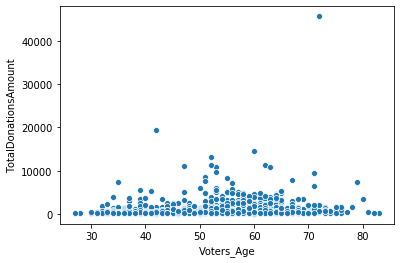

In [61]:
sns.scatterplot(y='TotalDonationsAmount', x='Voters_Age', data=politic02)

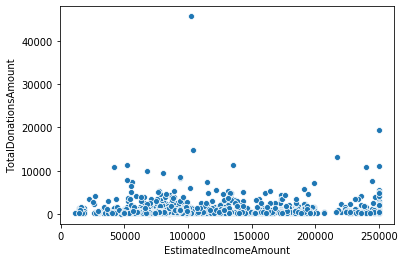

In [62]:
sns.scatterplot(y='TotalDonationsAmount', x='EstimatedIncomeAmount', data=politic02)

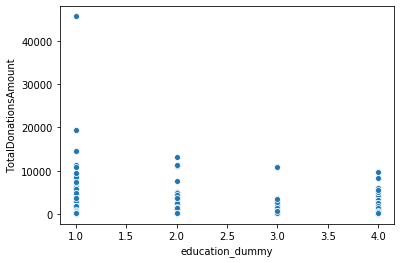

In [63]:
sns.scatterplot(y='TotalDonationsAmount', x='education_dummy', data=politic02)

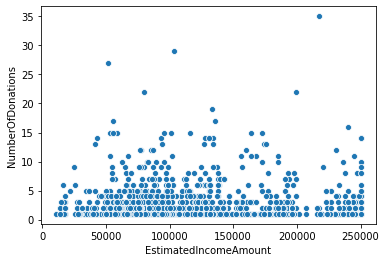

In [64]:
sns.scatterplot(y='NumberOfDonations', x='EstimatedIncomeAmount', data=politic02)

In [65]:
politic02['NumberOfDonations'].value_counts()

1.0     718
2.0     254
3.0     134
4.0      68
5.0      45
6.0      33
7.0      23
9.0      16
8.0      15
10.0      9
15.0      8
11.0      8
14.0      7
13.0      7
12.0      6
17.0      2
22.0      2
16.0      1
29.0      1
35.0      1
27.0      1
19.0      1
Name: NumberOfDonations, dtype: int64

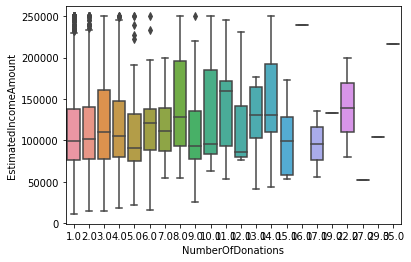

In [66]:
#need to make groups: number of donations 1<x<10 11<x<20 and >20

sns.boxplot(x='NumberOfDonations', y='EstimatedIncomeAmount', data=politic02);

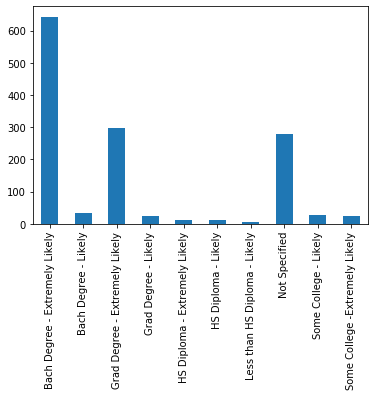

In [67]:
politic02['Education'].value_counts().sort_index().plot(kind='bar')

In [68]:
model = smf.ols('TotalDonationsAmount ~ Voters_Age + Voters_Gender + parties_dummy', data=politic02)

In [69]:
results = model.fit()

In [70]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     TotalDonationsAmount   R-squared:                       0.010
Model:                              OLS   Adj. R-squared:                  0.008
Method:                   Least Squares   F-statistic:                     4.672
Date:                  Wed, 20 Nov 2019   Prob (F-statistic):            0.00298
Time:                          19:59:53   Log-Likelihood:                -12171.
No. Observations:                  1358   AIC:                         2.435e+04
Df Residuals:                      1354   BIC:                         2.437e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -48.2695    301.658     -0.160      0.873    -640.037     543.498
Voters_Gender[T.M]    14.0125    102.707      0.136      0.892    -187.470     215.495
Voters_Age            19.4140      5.243      3.703      0.000       9.128      29.700
parties_dummy         -0.9848     13.767     -0.072      0.943     -27.992      26.022
==============================================================================
Omnibus:                     2401.820   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3166603.796
Skew:                          11.881   Prob(JB):                         0.00
Kurtosis:                     238.370   Cond. No.                         321.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
politic02['TotalDonationsAmount'].describe()

count     1360.000000
mean       994.076471
std       1899.163368
min         20.000000
25%        250.000000
50%        500.000000
75%       1000.000000
max      45640.000000
Name: TotalDonationsAmount, dtype: float64

In [72]:
# Split the Donation Amount variable into a binary variable.

politic02['Income900']=pd.cut(politic02['TotalDonationsAmount'], [0,900,politic02['TotalDonationsAmount'].max()], labels=[0,1])
politic02['Income900_i']=politic02['Income900'].astype(int)

In [73]:
politic02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360 entries, 0 to 1359
Data columns (total 75 columns):
Zip                                 1360 non-null float64
CensusTract                         1336 non-null float64
CensusBlockGroup                    1336 non-null float64
CensusBlock                         1336 non-null float64
Families_HHCount                    1360 non-null float64
HHGender                            1360 non-null object
HHParties                           1360 non-null object
Voters_Gender                       1358 non-null object
Voters_Age                          1360 non-null float64
Voters_BirthDate                    1341 non-null object
Parties                             1360 non-null object
Ethnic                              1210 non-null object
Religions                           822 non-null object
Languages                           981 non-null object
MaritalStatus                       1360 non-null object
PresenceOfChildrenCode            

In [74]:
politic02['EstimatedIncomeAmount'].mean()

117962.44303797468

In [75]:
model=smf.logit('Income900_i ~ Voters_Age + Voters_Gender + parties_dummy + EstimatedIncomeAmount + MaritalStatus', data=politic02)

In [76]:
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.580373
         Iterations 5


In [77]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Income900_i   No. Observations:                 1341
Model:                          Logit   Df Residuals:                     1334
Method:                           MLE   Df Model:                            6
Date:                Wed, 20 Nov 2019   Pseudo R-squ.:                 0.02298
Time:                        19:59:53   Log-Likelihood:                -778.28
converged:                       True   LL-Null:                       -796.58
Covariance Type:            nonrobust   LLR p-value:                 2.103e-06
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -3.1018      0.419     -7.395      0.000      -3.924      -2.280
Voters_Gender[T.M]                     0.1377      0.126      1.090      0.276      -0.110       0.385
MaritalStatus[T.Non-Traditional]       0.0750      0.235      0.320      0.749      -0.385       0.535
MaritalStatus[T.Single or Unknown]     0.0150      0.135      0.111      0.911      -0.250       0.280
Voters_Age                             0.0308      0.007      4.729      0.000       0.018       0.044
parties_dummy                         -0.0048      0.017     -0.286      0.775      -0.037       0.028
EstimatedIncomeAmount               3.584e-06   1.01e-06      3.532      0.000     1.6e-06    5.57e-06
======================================================================================================
"""

In [78]:
np.exp(results.params)

Intercept                             0.044969
Voters_Gender[T.M]                    1.147594
MaritalStatus[T.Non-Traditional]      1.077898
MaritalStatus[T.Single or Unknown]    1.015162
Voters_Age                            1.031320
parties_dummy                         0.995238
EstimatedIncomeAmount                 1.000004
dtype: float64

In [79]:
odds_ratios=np.exp(results.params)
odds_ratios

Intercept                             0.044969
Voters_Gender[T.M]                    1.147594
MaritalStatus[T.Non-Traditional]      1.077898
MaritalStatus[T.Single or Unknown]    1.015162
Voters_Age                            1.031320
parties_dummy                         0.995238
EstimatedIncomeAmount                 1.000004
dtype: float64

In [80]:
politic02['NumberOfDonations'].value_counts()

1.0     718
2.0     254
3.0     134
4.0      68
5.0      45
6.0      33
7.0      23
9.0      16
8.0      15
10.0      9
15.0      8
11.0      8
14.0      7
13.0      7
12.0      6
17.0      2
22.0      2
16.0      1
29.0      1
35.0      1
27.0      1
19.0      1
Name: NumberOfDonations, dtype: int64

In [81]:
# Split the Donation Amount variable into a binary variable.

politic02['donate1']=pd.cut(politic02['NumberOfDonations'], [0,1,politic02['NumberOfDonations'].max()], labels=[0,1])
politic02['donate1_i']=politic02['donate1'].astype(int)

In [82]:
politic02.head()

,Zip,CensusTract,CensusBlockGroup,CensusBlock,Families_HHCount,HHGender,HHParties,Voters_Gender,Voters_Age,Voters_BirthDate,Parties,Ethnic,Religions,Languages,MaritalStatus,PresenceOfChildrenCode,DwellingType,EstimatedIncomeAmount,Education,Occupation,HomePurchasePrice,PropertyType,EstHomeValue,HHComposition,US_Congressional_District,State_House_District,State_Senate_District,County,City,Home_Owner_Or_Renter,Net_Worth,Investor,OccupationIndustry,NumberOfDonations,TotalDonationsAmount,TotalDonationsAmt_Range,LastDonationDate,AvgDonation,AvgDonation_Range,PrimaryRecipientOfContributions,PcntHHWithChildren,PcntHHMarriedCoupleWithChild,PcntHHMarriedCoupleNoChild,PcntHHSpanishSpeaking,MedianEducationYears,Vote_Frequency,zip,lat,lng,city,state_id,state_name,population_x,density,State,population_y,violent_crime,murder_nonnegligent_manslaughter,rape,robbery,aggravated_assault,propert_crime,burglary,larceny_theft,motor_vehicle_theft,total_crime,parties_dummy,gender_dummy,education_dummy,occupation_dummy,dwelling_dummy,HHgender_dummy,marital_dummy,Income900,Income900_i,donate1,donate1_i
0,21047.0,303300.0,2.0,2016.0,2.0,Mixed Gender Household,Republican,F,76.0,3/20/1939,Republican,English/Welsh,Protestant,English,Married,Not Likely to have a child,Single Family Dwelling Unit,28000.0,Grad Degree - Extremely Likely,Unknown,123000.0,Residential,444393.0,1 adult Male & 1 adult Female,1.0,7,7,HARFORD,NaN,Likely Homeowner,$499999+,Yes,NaN,1.0,250.0,b. $101 to $250,9/27/2013,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,28%,25%,53%,2%,12.0,7.0,21047,39.52804,-76.43925,Fallston,MD,Maryland,11873,194.7,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137,302368,1,0,2,8,2,3,1,0,0,0,0
1,20902.0,703209.0,2.0,2016.0,3.0,Mixed Gender Household,Democratic,M,83.0,7/18/1932,Democratic,Hispanic,NaN,NaN,Non-Traditional,NaN,Unknown,65191.0,Not Specified,Unknown,NaN,Unknown,372471.0,Unknown,8.0,18,18,MONTGOMERY,NaN,Likely Homeowner,NaN,NaN,NaN,1.0,250.0,b. $101 to $250,8/1/2012,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,43%,28%,27%,39%,12.0,8.0,20902,39.04373,-77.04224,Silver Spring,MD,Maryland,48841,2486.7,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137,302368,2,1,4,8,3,3,3,0,0,0,0
2,21158.0,507500.0,1.0,1030.0,3.0,Mixed Gender Household,Democratic & Independent,M,68.0,2/15/1947,Democratic,NaN,NaN,NaN,Married,Not Likely to have a child,Single Family Dwelling Unit,80000.0,Bach Degree - Extremely Likely,Medical-Nurse,NaN,Residential,360517.0,Unknown,8.0,5,5,CARROLL,NaN,Likely Homeowner,$250000-499999,Yes,Medical,1.0,365.0,c. $251 to $500,11/17/2014,365.0,c. $251 to $500,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,30%,25%,47%,1%,12.0,5.0,21158,39.64672,-77.03250,Westminster,MD,Maryland,20234,105.0,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137,302368,9,1,1,4,2,3,1,0,0,0,0
3,20814.0,704403.0,1.0,1004.0,1.0,Female Only Household,Republican,F,65.0,4/3/1950,Republican,Russian (omitting former Soviet States),Catholic,English,Single or Unknown,Not Likely to have a child,Multi-Family Dwelling,61000.0,Bach Degree - Extremely Likely,Medical-Nurse,NaN,Condominium,268576.0,1 adult Female,8.0,16,16,MONTGOMERY,NaN,Likely Homeowner,$250000-499999,NaN,Medical,1.0,250.0,b. $101 to $250,3/5/2014,250.0,b. $101 to $250,"BONGINO, DANIEL",6%,5%,19%,7%,16.0,7.0,20814,39.00494,-77.10200,Bethesda,MD,Maryland,27642,2094.0,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137,302368,1,0,1,4,1,1,2,0,0,0,0
4,20735.0,801207.0,2.0,2043.0,2.0,Mixed Gender Household,Democratic,M,77.0,7/8/1938,Democratic,Likely Af-Am (Modeled),NaN,English,Single or Unknown,Known Data,Single Family Dwelling Unit,159000.0,Bach Degree - Extremely Likely,Medical-Nurse,NaN,Residential,222880.0,Unknown,5.0,27B,27,PRINCE GEORGES,NaN,NaN,$100000-249999,NaN,Medical,2.0,400.0,c. $251 to $500,7/9/2012,200.0,b. $101 to $250,"(Lib) OBAMA, BARACK",39%,26%,29%,5%,12.0,5.0,20735,38.75016,-76.905

In [83]:
model=smf.logit('donate1_i ~ Voters_Age + gender_dummy + parties_dummy + education_dummy + occupation_dummy + dwelling_dummy+\
HHgender_dummy + marital_dummy + Families_HHCount + EstimatedIncomeAmount + CensusBlockGroup +\
US_Congressional_District + EstHomeValue + Vote_Frequency + MedianEducationYears', data=politic02)

In [84]:
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.671795
         Iterations 5


In [85]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              donate1_i   No. Observations:                 1310
Model:                          Logit   Df Residuals:                     1294
Method:                           MLE   Df Model:                           15
Date:                Wed, 20 Nov 2019   Pseudo R-squ.:                 0.02844
Time:                        19:59:54   Log-Likelihood:                -880.05
converged:                       True   LL-Null:                       -905.82
Covariance Type:            nonrobust   LLR p-value:                 6.752e-06
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.4620      0.867     -2.841      0.004      -4.160      -0.763
Voters_Age                    0.0168      0.006      2.615      0.009       0.004       0.029
gender_dummy                  0.0548      0.122      0.451      0.652      -0.183       0.293
parties_dummy                 0.0172      0.016      1.078      0.281      -0.014       0.048
education_dummy               0.0944      0.070      1.350      0.177      -0.043       0.231
occupation_dummy             -0.0819      0.041     -1.977      0.048      -0.163      -0.001
dwelling_dummy               -0.0730      0.135     -0.540      0.589      -0.338       0.192
HHgender_dummy               -0.0105      0.102     -0.102      0.919      -0.211       0.190
marital_dummy                -0.0692      0.103     -0.672      0.502      -0.271       0.133
Families_HHCount             -0.0537      0.089     -0.605      0.546      -0.228       0.120
EstimatedIncomeAmount      8.162e-07   1.15e-06      0.708      0.479   -1.44e-06    3.07e-06
CensusBlockGroup              0.0162      0.052      0.314      0.754      -0.085       0.117
US_Congressional_District    -0.0147      0.007     -1.998      0.046      -0.029      -0.000
EstHomeValue              -2.853e-07   2.36e-07     -1.210      0.226   -7.47e-07    1.77e-07
Vote_Frequency                0.1219      0.031      3.917      0.000       0.061       0.183
MedianEducationYears          0.1134      0.051      2.217      0.027       0.013       0.214
=============================================================================================
"""

In [86]:
np.exp(results.params)

Intercept                    0.085268
Voters_Age                   1.016938
gender_dummy                 1.056296
parties_dummy                1.017361
education_dummy              1.098962
occupation_dummy             0.921330
dwelling_dummy               0.929578
HHgender_dummy               0.989589
marital_dummy                0.933169
Families_HHCount             0.947709
EstimatedIncomeAmount        1.000001
CensusBlockGroup             1.016335
US_Congressional_District    0.985408
EstHomeValue                 1.000000
Vote_Frequency               1.129638
MedianEducationYears         1.120042
dtype: float64

In [87]:
odds_ratios=np.exp(results.params)
odds_ratios

Intercept                    0.085268
Voters_Age                   1.016938
gender_dummy                 1.056296
parties_dummy                1.017361
education_dummy              1.098962
occupation_dummy             0.921330
dwelling_dummy               0.929578
HHgender_dummy               0.989589
marital_dummy                0.933169
Families_HHCount             0.947709
EstimatedIncomeAmount        1.000001
CensusBlockGroup             1.016335
US_Congressional_District    0.985408
EstHomeValue                 1.000000
Vote_Frequency               1.129638
MedianEducationYears         1.120042
dtype: float64

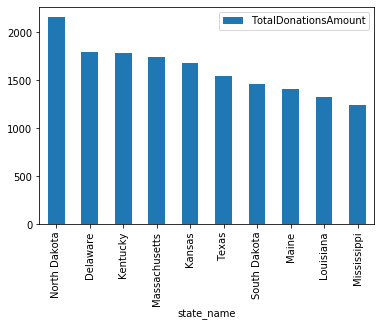

In [88]:
politic02.groupby('state_name').agg({'TotalDonationsAmount':'mean'}).nlargest(10, 'TotalDonationsAmount').plot(kind='bar')

In [89]:
politic02.head()

,Zip,CensusTract,CensusBlockGroup,CensusBlock,Families_HHCount,HHGender,HHParties,Voters_Gender,Voters_Age,Voters_BirthDate,Parties,Ethnic,Religions,Languages,MaritalStatus,PresenceOfChildrenCode,DwellingType,EstimatedIncomeAmount,Education,Occupation,HomePurchasePrice,PropertyType,EstHomeValue,HHComposition,US_Congressional_District,State_House_District,State_Senate_District,County,City,Home_Owner_Or_Renter,Net_Worth,Investor,OccupationIndustry,NumberOfDonations,TotalDonationsAmount,TotalDonationsAmt_Range,LastDonationDate,AvgDonation,AvgDonation_Range,PrimaryRecipientOfContributions,PcntHHWithChildren,PcntHHMarriedCoupleWithChild,PcntHHMarriedCoupleNoChild,PcntHHSpanishSpeaking,MedianEducationYears,Vote_Frequency,zip,lat,lng,city,state_id,state_name,population_x,density,State,population_y,violent_crime,murder_nonnegligent_manslaughter,rape,robbery,aggravated_assault,propert_crime,burglary,larceny_theft,motor_vehicle_theft,total_crime,parties_dummy,gender_dummy,education_dummy,occupation_dummy,dwelling_dummy,HHgender_dummy,marital_dummy,Income900,Income900_i,donate1,donate1_i
0,21047.0,303300.0,2.0,2016.0,2.0,Mixed Gender Household,Republican,F,76.0,3/20/1939,Republican,English/Welsh,Protestant,English,Married,Not Likely to have a child,Single Family Dwelling Unit,28000.0,Grad Degree - Extremely Likely,Unknown,123000.0,Residential,444393.0,1 adult Male & 1 adult Female,1.0,7,7,HARFORD,NaN,Likely Homeowner,$499999+,Yes,NaN,1.0,250.0,b. $101 to $250,9/27/2013,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,28%,25%,53%,2%,12.0,7.0,21047,39.52804,-76.43925,Fallston,MD,Maryland,11873,194.7,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137,302368,1,0,2,8,2,3,1,0,0,0,0
1,20902.0,703209.0,2.0,2016.0,3.0,Mixed Gender Household,Democratic,M,83.0,7/18/1932,Democratic,Hispanic,NaN,NaN,Non-Traditional,NaN,Unknown,65191.0,Not Specified,Unknown,NaN,Unknown,372471.0,Unknown,8.0,18,18,MONTGOMERY,NaN,Likely Homeowner,NaN,NaN,NaN,1.0,250.0,b. $101 to $250,8/1/2012,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,43%,28%,27%,39%,12.0,8.0,20902,39.04373,-77.04224,Silver Spring,MD,Maryland,48841,2486.7,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137,302368,2,1,4,8,3,3,3,0,0,0,0
2,21158.0,507500.0,1.0,1030.0,3.0,Mixed Gender Household,Democratic & Independent,M,68.0,2/15/1947,Democratic,NaN,NaN,NaN,Married,Not Likely to have a child,Single Family Dwelling Unit,80000.0,Bach Degree - Extremely Likely,Medical-Nurse,NaN,Residential,360517.0,Unknown,8.0,5,5,CARROLL,NaN,Likely Homeowner,$250000-499999,Yes,Medical,1.0,365.0,c. $251 to $500,11/17/2014,365.0,c. $251 to $500,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,30%,25%,47%,1%,12.0,5.0,21158,39.64672,-77.03250,Westminster,MD,Maryland,20234,105.0,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137,302368,9,1,1,4,2,3,1,0,0,0,0
3,20814.0,704403.0,1.0,1004.0,1.0,Female Only Household,Republican,F,65.0,4/3/1950,Republican,Russian (omitting former Soviet States),Catholic,English,Single or Unknown,Not Likely to have a child,Multi-Family Dwelling,61000.0,Bach Degree - Extremely Likely,Medical-Nurse,NaN,Condominium,268576.0,1 adult Female,8.0,16,16,MONTGOMERY,NaN,Likely Homeowner,$250000-499999,NaN,Medical,1.0,250.0,b. $101 to $250,3/5/2014,250.0,b. $101 to $250,"BONGINO, DANIEL",6%,5%,19%,7%,16.0,7.0,20814,39.00494,-77.10200,Bethesda,MD,Maryland,27642,2094.0,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137,302368,1,0,1,4,1,1,2,0,0,0,0
4,20735.0,801207.0,2.0,2043.0,2.0,Mixed Gender Household,Democratic,M,77.0,7/8/1938,Democratic,Likely Af-Am (Modeled),NaN,English,Single or Unknown,Known Data,Single Family Dwelling Unit,159000.0,Bach Degree - Extremely Likely,Medical-Nurse,NaN,Residential,222880.0,Unknown,5.0,27B,27,PRINCE GEORGES,NaN,NaN,$100000-249999,NaN,Medical,2.0,400.0,c. $251 to $500,7/9/2012,200.0,b. $101 to $250,"(Lib) OBAMA, BARACK",39%,26%,29%,5%,12.0,5.0,20735,38.75016,-76.905

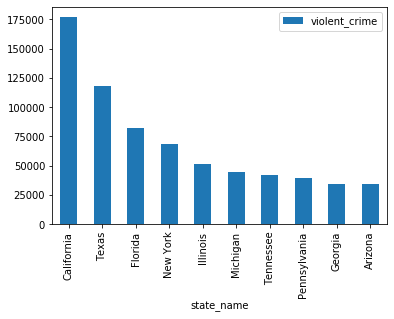

In [90]:
politic02.groupby('state_name').agg({'violent_crime':'mean'}).nlargest(10, 'violent_crime').plot(kind='bar')

In [91]:
politic02.head(3)

,Zip,CensusTract,CensusBlockGroup,CensusBlock,Families_HHCount,HHGender,HHParties,Voters_Gender,Voters_Age,Voters_BirthDate,Parties,Ethnic,Religions,Languages,MaritalStatus,PresenceOfChildrenCode,DwellingType,EstimatedIncomeAmount,Education,Occupation,HomePurchasePrice,PropertyType,EstHomeValue,HHComposition,US_Congressional_District,State_House_District,State_Senate_District,County,City,Home_Owner_Or_Renter,Net_Worth,Investor,OccupationIndustry,NumberOfDonations,TotalDonationsAmount,TotalDonationsAmt_Range,LastDonationDate,AvgDonation,AvgDonation_Range,PrimaryRecipientOfContributions,PcntHHWithChildren,PcntHHMarriedCoupleWithChild,PcntHHMarriedCoupleNoChild,PcntHHSpanishSpeaking,MedianEducationYears,Vote_Frequency,zip,lat,lng,city,state_id,state_name,population_x,density,State,population_y,violent_crime,murder_nonnegligent_manslaughter,rape,robbery,aggravated_assault,propert_crime,burglary,larceny_theft,motor_vehicle_theft,total_crime,parties_dummy,gender_dummy,education_dummy,occupation_dummy,dwelling_dummy,HHgender_dummy,marital_dummy,Income900,Income900_i,donate1,donate1_i
0,21047.0,303300.0,2.0,2016.0,2.0,Mixed Gender Household,Republican,F,76.0,3/20/1939,Republican,English/Welsh,Protestant,English,Married,Not Likely to have a child,Single Family Dwelling Unit,28000.0,Grad Degree - Extremely Likely,Unknown,123000.0,Residential,444393.0,1 adult Male & 1 adult Female,1.0,7,7,HARFORD,NaN,Likely Homeowner,$499999+,Yes,NaN,1.0,250.0,b. $101 to $250,9/27/2013,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,28%,25%,53%,2%,12.0,7.0,21047,39.52804,-76.43925,Fallston,MD,Maryland,11873,194.7,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137,302368,1,0,2,8,2,3,1,0,0,0,0
1,20902.0,703209.0,2.0,2016.0,3.0,Mixed Gender Household,Democratic,M,83.0,7/18/1932,Democratic,Hispanic,NaN,NaN,Non-Traditional,NaN,Unknown,65191.0,Not Specified,Unknown,NaN,Unknown,372471.0,Unknown,8.0,18,18,MONTGOMERY,NaN,Likely Homeowner,NaN,NaN,NaN,1.0,250.0,b. $101 to $250,8/1/2012,250.0,b. $101 to $250,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,43%,28%,27%,39%,12.0,8.0,20902,39.04373,-77.04224,Silver Spring,MD,Maryland,48841,2486.7,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137,302368,2,1,4,8,3,3,3,0,0,0,0
2,21158.0,507500.0,1.0,1030.0,3.0,Mixed Gender Household,Democratic & Independent,M,68.0,2/15/1947,Democratic,NaN,NaN,NaN,Married,Not Likely to have a child,Single Family Dwelling Unit,80000.0,Bach Degree - Extremely Likely,Medical-Nurse,NaN,Residential,360517.0,Unknown,8.0,5,5,CARROLL,NaN,Likely Homeowner,$250000-499999,Yes,Medical,1.0,365.0,c. $251 to $500,11/17/2014,365.0,c. $251 to $500,AMERICAN ASSOC OF NURSE ANESTHETISTS SEPARATE ...,30%,25%,47%,1%,12.0,5.0,21158,39.64672,-77.03250,Westminster,MD,Maryland,20234,105.0,Maryland,6042718,28320,490,1979,9716,16135,122864,18892,91835,12137,302368,9,1,1,4,2,3,1,0,0,0,0


In [92]:
sas=politic02[['TotalDonationsAmount','Voters_Age','gender_dummy','parties_dummy','education_dummy','occupation_dummy',\
               'dwelling_dummy','HHgender_dummy','marital_dummy','donate1_i','Income900_i']]
sas.to_csv('sas.csv')
politic02.to_csv('cleaned data.csv')